In [29]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 6]

In [30]:
arquivo_precos = 'data/prices/SE_A+2.csv'
arquivo_cmo = 'data/newave/cmarg.csv'

precos_df = pd.read_csv(arquivo_precos, parse_dates=['Date'], index_col='Date')
cmo_df = pd.read_csv(arquivo_cmo, parse_dates=['date'], index_col='date')

df = pd.concat([precos_df['Price'], cmo_df['cmo_se']], axis=1).dropna()

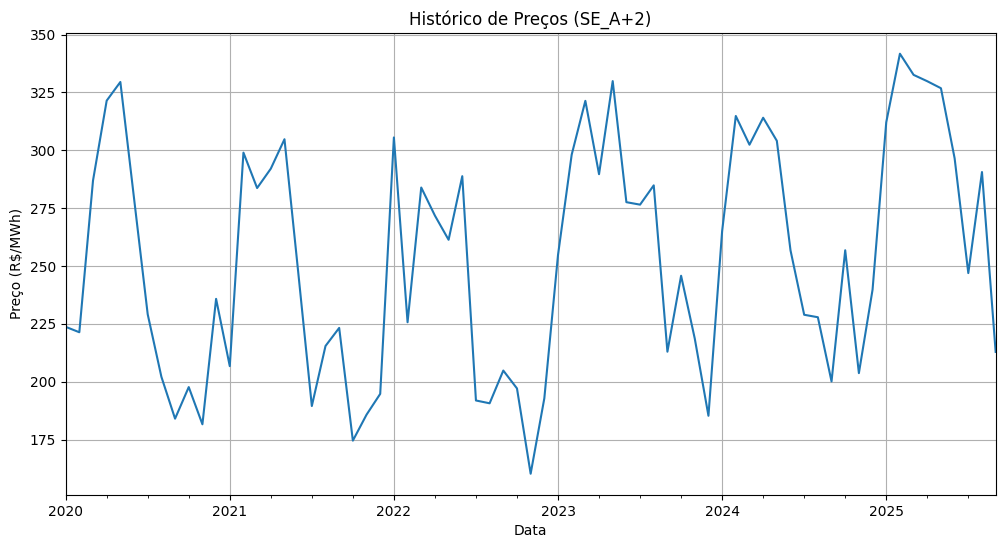

In [31]:
df['Price'].plot()
plt.title('Histórico de Preços (SE_A+2)')
plt.ylabel('Preço (R$/MWh)')
plt.xlabel('Data')
plt.grid(True)
plt.show()

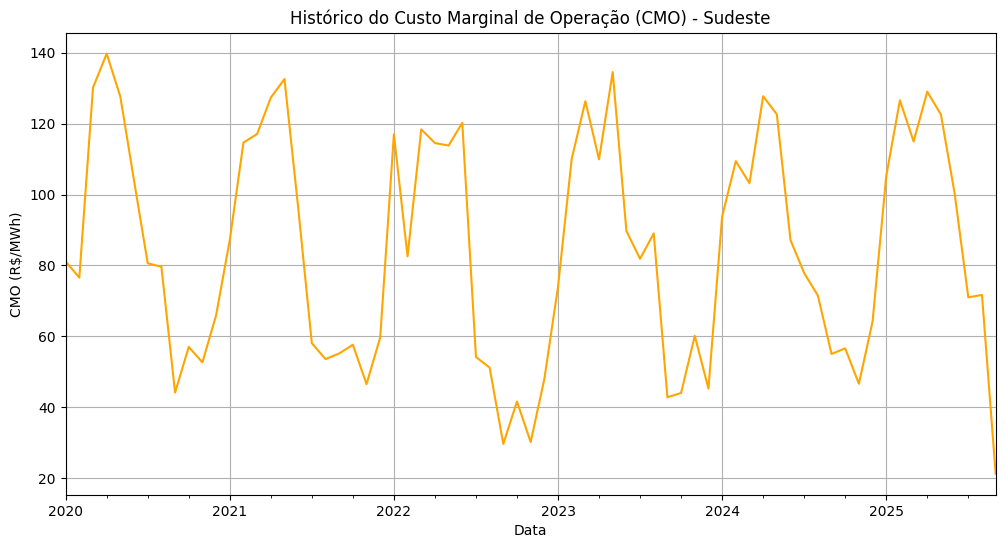

In [32]:
df['cmo_se'].plot(color='orange')
plt.title('Histórico do Custo Marginal de Operação (CMO) - Sudeste')
plt.ylabel('CMO (R$/MWh)')
plt.xlabel('Data')
plt.grid(True)
plt.show()

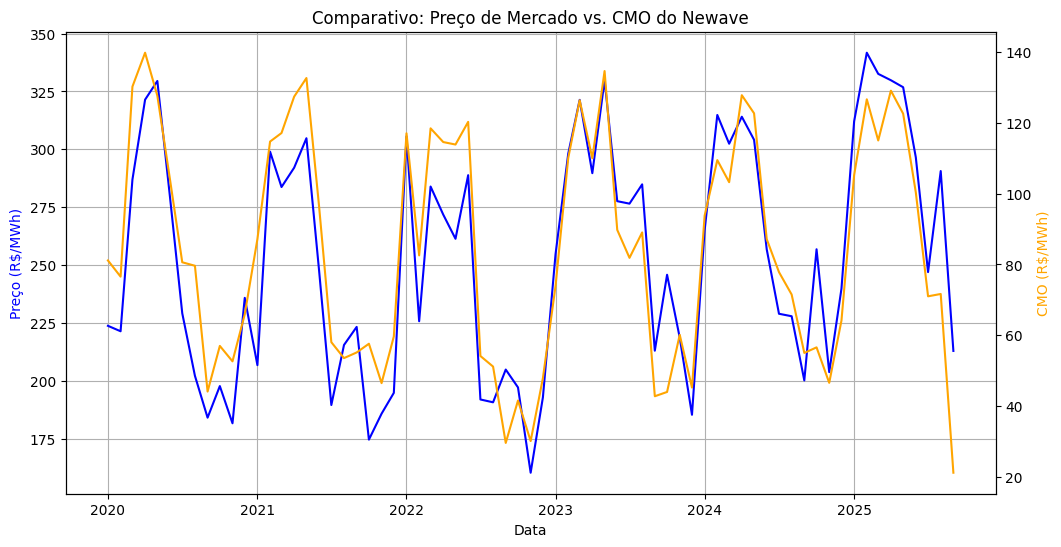

In [33]:
fig, ax1 = plt.subplots()

ax1.plot(df.index, df['Price'], color='blue', label='Preço (Eixo Esq.)')
ax1.set_xlabel('Data')
ax1.set_ylabel('Preço (R$/MWh)', color='blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(df.index, df['cmo_se'], color='orange', label='CMO (Eixo Dir.)')
ax2.set_ylabel('CMO (R$/MWh)', color='orange')

plt.title('Comparativo: Preço de Mercado vs. CMO do Newave')
plt.show()

In [34]:
correlacao = df['Price'].corr(df['cmo_se'])
print(f'Correlação entre Preço e CMO: {correlacao:.2f}')

Correlação entre Preço e CMO: 0.89


In [35]:
print(df.columns)

Index(['Price', 'cmo_se'], dtype='object')
